# Stroke Prediction - Breve explicación.
***por Borja Ramos Oliva***

Este dataset deriva de un estudio de algo más de 5000 pacientes en los que se incluyen ciertos parámetros de salud y bienestar que podrían o no influir en un posible accidente cerebrovascular, también llamado ictus.

### Por qué he decidido este dataset?

Dada la importancia del ictus y su impacto en muerte y discapacidad a nivel mundial, se puede estudiar a partir de los datos qué factores de riesgo derivados de esta muestra se pueden identificar para atajarlos, o al menos, mitigarlos. Trataremos de entender qué perfiles de pacientes tienen mayor riesgo, e intentar modelar los datos para detectarlo.

### Objetivo de este EDA

- Entender pacientes, y los patrones que aparecen en sus datos.
- Identificar relaciones entre otras variables y la variable objetivo.
- Preparar el dataset para poder usarlo con otros análisis.

### Valoraciones finales (al final del ejercicio)
por ejemplo que hay factores de riesgo detectables facilmente con datos muy básicos (tampoco las variables son muy complejas)


<hr>

# 1 - PREPARACION Y EXTRACCION DE DATOS

In [1]:
### Celda 1 - Imports
!pip install imbalanced-learn
from pathlib import Path
from IPython.display import display ### Esta librería siempre la uso para mostrar los outputs de forma más limpia
import urllib.request # para descargar archivos desde una URL (el dataset lo descargo de forma automática desde GitHub)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Celda 2 -  Setup y descarga automática del dataset, sin necesidad de credenciales
# Detectamos entorno
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Setup directorios
BASE_DIR = Path('/content') if IN_COLAB else Path.cwd()
DATA_DIR = BASE_DIR / 'data'
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Configuración del dataset
DATASET_URL = 'https://raw.githubusercontent.com/borja-ro/SAA_Trabajo_EV1/main/data/healthcare-dataset-stroke-data.csv'
CSV_FILENAME = 'healthcare-dataset-stroke-data.csv'
dataset_path = DATA_DIR / CSV_FILENAME

# Descargar si no existe
if not dataset_path.exists():
    urllib.request.urlretrieve(DATASET_URL, dataset_path)
    print("✅ Dataset descargado correctamente")
else:
    print("✅ Dataset cargado desde local")

# Cargar dataset
df = pd.read_csv(dataset_path)

print(f"📂 Directorio de trabajo: {BASE_DIR}")
print(f"📂 Directorio de datos: {DATA_DIR}")


✅ Dataset descargado correctamente
📂 Directorio de trabajo: /content
📂 Directorio de datos: /content/data


In [3]:
### Celda 3 - Inspección inicial del dataset
print("\n Primeras filas del df:")
display(df.head())
print("\n Últimas filas del df:")
display(df.tail())


 Primeras filas del df:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



 Últimas filas del df:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


#### Lo primero que voy a hacer va a ser ver los nombres de las columnas, y traducir los encabezados al español

In [4]:
### Celda 4 - Inspección de nombres de columnas
print("Nombres de columnas:")
display(df.columns)
print("Como lista:")
display(list(df.columns))

Nombres de columnas:


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Como lista:


['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [5]:
### Celda 5 - Renombrar columnas al español
### Me creo un diccionario con la traducción de las columnas y la aplico
columnas_traducidas = {
    'id': 'id',
    'gender': 'genero',
    'age': 'edad',
    'hypertension': 'hipertension',
    'heart_disease': 'enfermedad_cardiaca',
    'ever_married': 'estado_civil',
    'work_type': 'tipo_empleo',
    'Residence_type': 'zona_residencia',
    'avg_glucose_level': 'glucosa_promedio',
    'bmi': 'imc', # índice de masa corporal, lo podría haber dejado como bmi que se acepta también en español
    'smoking_status': 'fumador',
    'stroke': 'accidente_cerebrovascular'
}

# Renombramos y verificamos
df.rename(columns=columnas_traducidas, inplace=True)
display(list(df.columns))

['id',
 'genero',
 'edad',
 'hipertension',
 'enfermedad_cardiaca',
 'estado_civil',
 'tipo_empleo',
 'zona_residencia',
 'glucosa_promedio',
 'imc',
 'fumador',
 'accidente_cerebrovascular']

In [6]:
### Celda 6 - Información de filas y columnas
print("\n Info del DataFrame:")
df.info()
print("\n Número de filas:")
display(len(df))
print("Número de columnas:")
display(len(df.columns))


 Info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5110 non-null   int64  
 1   genero                     5110 non-null   object 
 2   edad                       5110 non-null   float64
 3   hipertension               5110 non-null   int64  
 4   enfermedad_cardiaca        5110 non-null   int64  
 5   estado_civil               5110 non-null   object 
 6   tipo_empleo                5110 non-null   object 
 7   zona_residencia            5110 non-null   object 
 8   glucosa_promedio           5110 non-null   float64
 9   imc                        4909 non-null   float64
 10  fumador                    5110 non-null   object 
 11  accidente_cerebrovascular  5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

 Número de filas:


5110

Número de columnas:


12

In [7]:
### Celda 7 - Tipos de datos
print("Tipos de datos:")
display(df.dtypes.value_counts())
display(df.dtypes)


Tipos de datos:


,count
object,5
int64,4
float64,3


,0
id,int64
genero,object
edad,float64
hipertension,int64
enfermedad_cardiaca,int64
estado_civil,object
tipo_empleo,object
zona_residencia,object
glucosa_promedio,float64
imc,float64


In [8]:
### Celda 8 - Valores únicos por columna
print("\n Número de valores únicos categóricos por columna:")
display(df.select_dtypes(include=['object']).nunique())
print("\n Número de valores únicos numéricos por columna:")
display(df.select_dtypes(include=['number']).nunique())


 Número de valores únicos categóricos por columna:


,0
genero,3
estado_civil,2
tipo_empleo,5
zona_residencia,2
fumador,4



 Número de valores únicos numéricos por columna:


,0
id,5110
edad,104
hipertension,2
enfermedad_cardiaca,2
glucosa_promedio,3979
imc,418
accidente_cerebrovascular,2


In [9]:
### Celda 9 - Estadísticas descriptivas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
genero,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hipertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
enfermedad_cardiaca,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
estado_civil,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_empleo,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zona_residencia,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glucosa_promedio,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
imc,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


### Qué me dice este resultado:
- id es identificador aleatorio, se puede quitar para el análisis
- género tiene 3 categorías. en Female vemos que es mucho más frecuente (2994 de 5110 registros), el datasete está desbalanceado aquí
- edad vemos que la media es 43 años. también vemos que la distribución es bastante amplia. desde niños de 8 meses(?) hasta personas de 82 años.
- hipertensión - observando que la media es 0.097, es decir, que un 9..7% de la muestra tiene hipertensión, o sea, casi uno de cada diez.
- enfermedad_cardiaca - de igual manera que hipertensión, vemos que la media resulta que un 5% de la muestra sufre de alguna enfermedad de este tipo
- estado_civil - hay desbalanceo en el sí, o sea en el casado! luego veremos si correlaciona o no...
- tipo_empleo - hay 5 categorías, de las cuales "Private" es la mayor. Supondremos que es "trabajador por cuenta ajena" pero lo investigaremos luego
- zona_residencia - hay dos categorías, de las que Urban es un poco mayor (que Rural), pero no por mucho, es prácticamente empate técnico. En este aspecto los datos están balanceados.
- glucosa_promedio - la media es de 106 (dentro de la normalidad). hay un max de ... 271!!! Veremos luego si correlan las cifras.
- imc - como vemos en la primera columna, ya no son 5110, sino 4909, o sea faltan unos 200 datos. Ojo que la media es 28.1, lo cual es alto (a partir de 30 se considera ya obesidad), pero hay un valor máximo de 97.6 ??? obviamente tiene que ser un outlier. luego lo explico
- fumador - la mayor parte de la muestra no fumó nunca. hay 4 categorías que iremos viendo.
- accidente_cerebrovascular - hay una media de 4.8% personas que tuvieron un ictus. obviamente hace que esté muy desbalanceado

In [10]:
### Celda 10 - Análisis de valores nulos
print("\n Conteo de nulos en todo el dataset:")
display(df.isnull().sum().sum())

print("\n Conteo de nulos por columna:")
display(df.isnull().sum())

print("\n Porcentaje de nulos por columna:")
display(df.isnull().sum() / len(df) * 100)

print("\n Ejemplo de filas con al menos un valor nulo:")
display(df[df.isnull().any(axis=1)].head())


 Conteo de nulos en todo el dataset:


np.int64(201)


 Conteo de nulos por columna:


,0
id,0
genero,0
edad,0
hipertension,0
enfermedad_cardiaca,0
estado_civil,0
tipo_empleo,0
zona_residencia,0
glucosa_promedio,0
imc,201



 Porcentaje de nulos por columna:


,0
id,0.000000
genero,0.000000
edad,0.000000
hipertension,0.000000
enfermedad_cardiaca,0.000000
estado_civil,0.000000
tipo_empleo,0.000000
zona_residencia,0.000000
glucosa_promedio,0.000000
imc,3.933464



 Ejemplo de filas con al menos un valor nulo:


,id,genero,edad,hipertension,enfermedad_cardiaca,estado_civil,tipo_empleo,zona_residencia,glucosa_promedio,imc,fumador,accidente_cerebrovascular
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


Ok, como vemos en la tabla de "Conteo de nulos" o "Porcentaje de nulos por columna" , sólo hay nulos en los valores de imc.
Trataremos con ellos en el siguiente apartado.

<hr>

# 2 ESTUDIO DE VARIABLES

### Analicemos las variables. Tenemos:

### 1. - Numéricas:

***1.1 - Discretas:***

- id - Identificador → técnicamente es numérica, pero no debe usarse para análisis.
- hipertension - 0/1 → binaria (pero numéricamente discreta si queremos clasificarla arrítmicamente).
- enfermedad_cardiaca - 0/1 → igual que la anterior.
- accidente_cerebrovascular - 0/1 → al tratarla como variable objetivo es categórica pero en la clasificación estricta de numéricas, sería discreta binaria.

***1.2 - Continuas:***

Columna
Ejemplos
Explicación
- edad - 13.0, 49.0, 81.0 Se comporta como continua aunque sean enteros.
- glucosa_promedio - 82.99, 228.69 Es una medida continua.
- imc - 18.6, 29.0, 40.0 - También continua.

### 2. Variables categóricas

#### 2.1. Nominales (sin orden intrínseco)

- genero - Male, Female, Other.
- estado_civil - Yes / No (indica si la persona ha estado casada alguna vez).
- tipo_empleo - Private, Self-employed, Govt_job, children, Never_worked.
- zona_residencia - Urban / Rural.
- fumador - never smoked, formerly smoked, smokes, Unknown.
- accidente_cerebrovascualr: esta variable **ya está codificada como 0/1**, conceptualmente es una variable categórica binaria (No / Sí), que usaremos como **variable objetivo** del problema.

#### 2.2. Ordinales

En este dataset no hay detecto claramente ordinales, es decir, no tengo, por ejemplo, niveles de estudios tipo primaria / secundaria / universidad



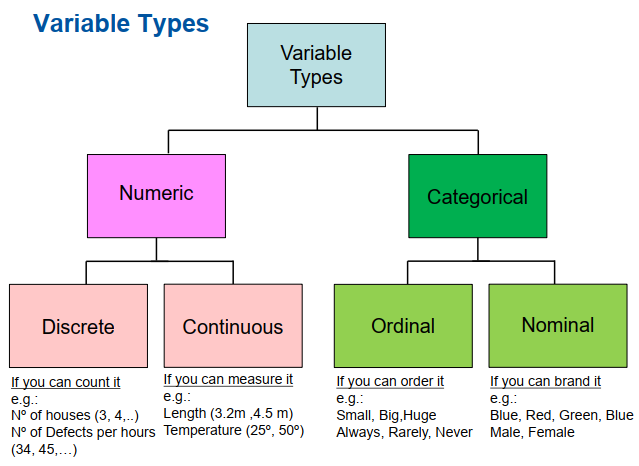

<hr>

In [11]:
### Celda 11 - Conteo de valores únicos por columna
print("\n Conteo de valores únicos por columna:")
display(df.nunique())


 Conteo de valores únicos por columna:


,0
id,5110
genero,3
edad,104
hipertension,2
enfermedad_cardiaca,2
estado_civil,2
tipo_empleo,5
zona_residencia,2
glucosa_promedio,3979
imc,418


Qué me dice esto? al hacer nunique lo que obtengo son valores únicos por columna. Como hemos visto al inspeccionar el dataframe haciendo head y tail, hay valores categóricos en muchas columnas, entre ellas, la variable objetivo, que es accidente_cerebrovascular.

In [12]:
### Celda 12 - Porcentaje de frecuencia de la columna 'genero'
display(df['genero'].value_counts(normalize=True) * 100)

,proportion
genero,
Female,58.590998
Male,41.389432
Other,0.019569


In [13]:
### Celda 13 - Análisis de la columna 'estado_civil'
display(df['estado_civil'].describe())

,estado_civil
count,5110
unique,2
top,Yes
freq,3353


Como veíamos en la explicación de los tipos, hay ya valores categóricos "hardcodeados" en el dataset. para analizar qué es cada valor numérico, a falta de información en el dataset, vamos a hallar los porcentajes de valores para así tener mayor información.

In [14]:
### Celda 14 - Porcentaje de frecuencia de la columna 'enfermedad_cardiaca'
print("\n Porcentaje de valores en 'enfermedad_cardiaca':")
display(df['enfermedad_cardiaca'].value_counts(normalize=True) * 100)


 Porcentaje de valores en 'enfermedad_cardiaca':


,proportion
enfermedad_cardiaca,
0,94.598826
1,5.401174


Casi un 95% de los resultados es "0" podríamos deducir que el 0 significa que NO tiene enfermedad cardiaca, mientras que el 1 sí.
Aunque no tenemos documentación oficial, es razonable pensar que 0 representa ausencia de enfermedad cardíaca y 1 presencia, porque este patrón es típico en variables binarias

In [15]:
### Celda 15 - Porcentaje de frecuencia - resto de columnas
print("Porcentaje de valores en 'hipertension':")
display(df['hipertension'].value_counts(normalize=True) * 100)
print("Porcentaje de valores en 'accidente_cerebrovascular':")
display(df['accidente_cerebrovascular'].value_counts(normalize=True) * 100)
print("Porcentaje de valores en 'estado_civil':")
display(df['estado_civil'].value_counts(normalize=True) * 100)
print("Porcentaje de 'zona_residencia':")
display(df['zona_residencia'].value_counts(normalize=True) * 100)
print("Porcentaje de valores de 'fumador':")
display(df['fumador'].value_counts(normalize=True) * 100)

Porcentaje de valores en 'hipertension':


,proportion
hipertension,
0,90.254403
1,9.745597


Porcentaje de valores en 'accidente_cerebrovascular':


,proportion
accidente_cerebrovascular,
0,95.127202
1,4.872798


Porcentaje de valores en 'estado_civil':


,proportion
estado_civil,
Yes,65.616438
No,34.383562


Porcentaje de 'zona_residencia':


,proportion
zona_residencia,
Urban,50.802348
Rural,49.197652


Porcentaje de valores de 'fumador':


,proportion
fumador,
never smoked,37.025440
Unknown,30.215264
formerly smoked,17.318982
smokes,15.440313


En la variable "fumador" aparece una categoría "Unknown" (aprox 30%).  
Esto indica que en un número importante de registros no se dispone de la información sobre hábitos de tabaquismo.

No podemos saber si "Unknown" equivale a no registrado, no contesta o un error del sistema,  
pero sí podemos cuantificar su impacto y estudiar si se distribuye de forma distinta según la edad o el sexo.

##### Vamos a investigar un poco más

In [16]:
### Celda 16 - Análisis de relaciones entre variables
print("Relación entre 'fumador' y 'accidente_cerebrovascular':")
display(df.groupby('fumador')['accidente_cerebrovascular'].mean().sort_values(ascending=False))
print("Los 'fumador' unknown, qué edades tienen?")
display(df.groupby('fumador')['edad'].describe())
print("Hay relación entre fumador y género?")
display(pd.crosstab(df['fumador'], df['genero'], normalize='index') * 100)

Relación entre 'fumador' y 'accidente_cerebrovascular':


,accidente_cerebrovascular
fumador,
formerly smoked,0.079096
smokes,0.053232
never smoked,0.047569
Unknown,0.030440


Los 'fumador' unknown, qué edades tienen?


,count,mean,std,min,25%,50%,75%,max
fumador,,,,,,,,
Unknown,1544.0,30.229922,25.055556,0.08,8.0,23.0,51.0,82.0
formerly smoked,885.0,54.929944,17.641723,10.00,43.0,57.0,69.0,82.0
never smoked,1892.0,46.744715,19.769584,10.00,31.0,47.0,62.0,82.0
smokes,789.0,47.096324,16.413002,10.00,33.0,47.0,59.0,82.0


Hay relación entre fumador y género?


genero,Female,Male,Other
fumador,,,
Unknown,54.145078,45.854922,0.000000
formerly smoked,53.898305,45.988701,0.112994
never smoked,64.957717,35.042283,0.000000
smokes,57.287706,42.712294,0.000000


Explicación posible:
como vemos en la relación entre "fumador" y "accidente_cerebrovascular", en formerly smoked tenemos casi un 8% , es decir, muy por encima de la media del dataset (que era de 4.8%)
Puede ser esta variable clave para entender la predicción de ictus? Lo veremos más adelante. no sólo puede ser este el motivo, o sí? veremos más adelante.


In [17]:
### Celda 17 - Análisis de relación entre fumador y género
display(pd.crosstab(df['fumador'], df['genero'], normalize='columns') * 100)

genero,Female,Male,Other
fumador,,,
Unknown,27.922512,33.475177,0.0
formerly smoked,15.931864,19.243499,100.0
never smoked,41.048764,31.347518,0.0
smokes,15.096860,15.933806,0.0


De este apartado hemos obtenido datos valiosos para luego hacer referencias cruzadas entre las variables. Por ahora lo voy a dejar aquí, porque antes de hacer nada, debería convertir correctamente los tipos de las variables del dataset.

<hr>

Recordemos el tipo de datos antes de transformarlos

In [18]:
### Celda 18 - Tipos de datos
display (df.head())
display(df.dtypes)

,id,genero,edad,hipertension,enfermedad_cardiaca,estado_civil,tipo_empleo,zona_residencia,glucosa_promedio,imc,fumador,accidente_cerebrovascular
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,0
id,int64
genero,object
edad,float64
hipertension,int64
enfermedad_cardiaca,int64
estado_civil,object
tipo_empleo,object
zona_residencia,object
glucosa_promedio,float64
imc,float64


En un principio, viendo que hay niños de menos de un año, iba a redondear hacia arriba para que al convertir la edad a int, se quedaran como edad 1 y no edad 0. Vamos a ver qué cantidad de estos casos hay, y luego tomamos la decisión

In [19]:
### Celda 19 - Estudiemos menores de 1 año
print("Localizamos las personas cuya edad es menor que 1:")
display(df[df['edad'] < 1].shape[0])
df[df['edad'] < 1]

Localizamos las personas cuya edad es menor que 1:


43

,id,genero,edad,hipertension,enfermedad_cardiaca,estado_civil,tipo_empleo,zona_residencia,glucosa_promedio,imc,fumador,accidente_cerebrovascular
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


Viendo que hay bastantes casos, y que además en estudios médicos NO es buena práctica redondear hacia arriba en edades, voy a dejarlo tal cual, no voy a convertir a int.

Las que sí vamos a convertir a int son las binarias que aparecen como float, hipertension, enfermedad_cardiaca, accidente_cerebrovascular.
Aparte de la edad, otros valores numéricos como glucosa_promedio o imc sí que puede tener sentido que estén como float

In [20]:
### Celda 20 - Conversión a int de binarias
cols_binarias = ['hipertension', 'enfermedad_cardiaca', 'accidente_cerebrovascular']

df[cols_binarias] = df[cols_binarias].astype(int)

df[cols_binarias].dtypes

,0
hipertension,int64
enfermedad_cardiaca,int64
accidente_cerebrovascular,int64


#### Vamos a analizar ahora las distribuciones de las variables

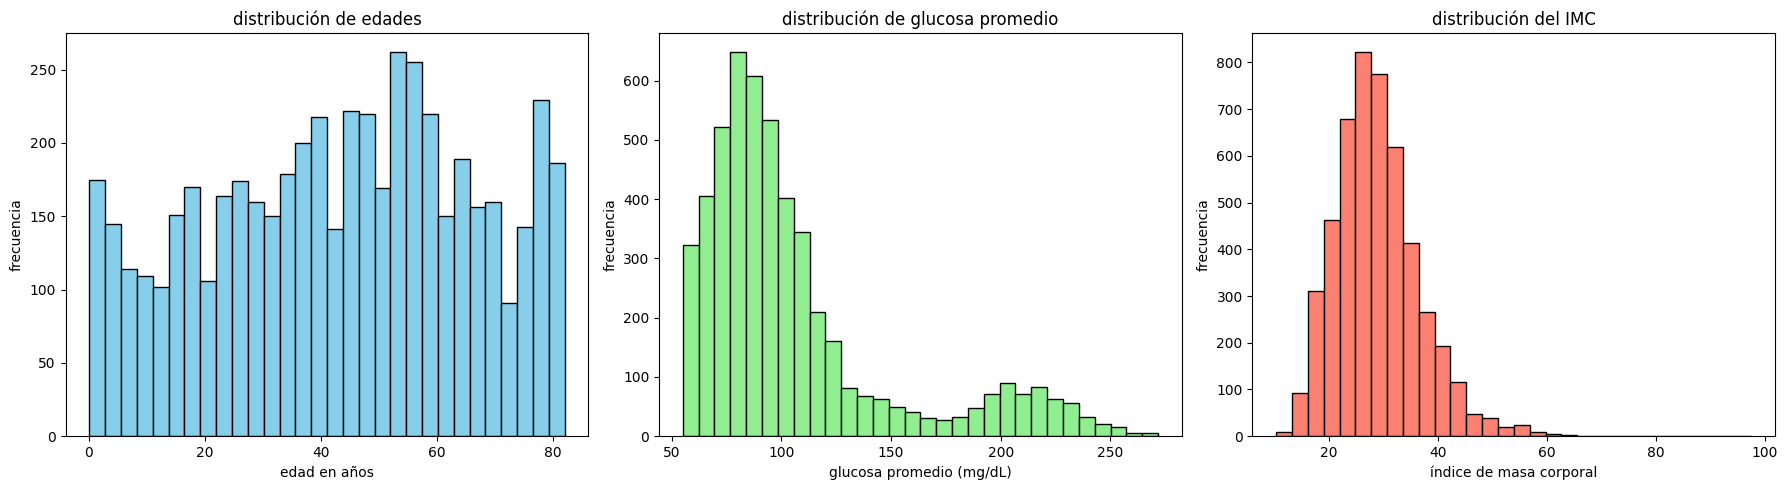

In [21]:
### Celda 21 - Histogramas de variables numéricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# edad
axes[0].hist(df['edad'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title("distribución de edades")
axes[0].set_xlabel("edad en años")
axes[0].set_ylabel("frecuencia")

# glucosa_promedio
axes[1].hist(df['glucosa_promedio'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title("distribución de glucosa promedio")
axes[1].set_xlabel("glucosa promedio (mg/dL)")
axes[1].set_ylabel("frecuencia")

# imc
axes[2].hist(df['imc'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title("distribución del IMC")
axes[2].set_xlabel("índice de masa corporal")
axes[2].set_ylabel("frecuencia")

plt.tight_layout()
plt.show()

Y las variables categóricas? Las graficamos con diagramas de barras:

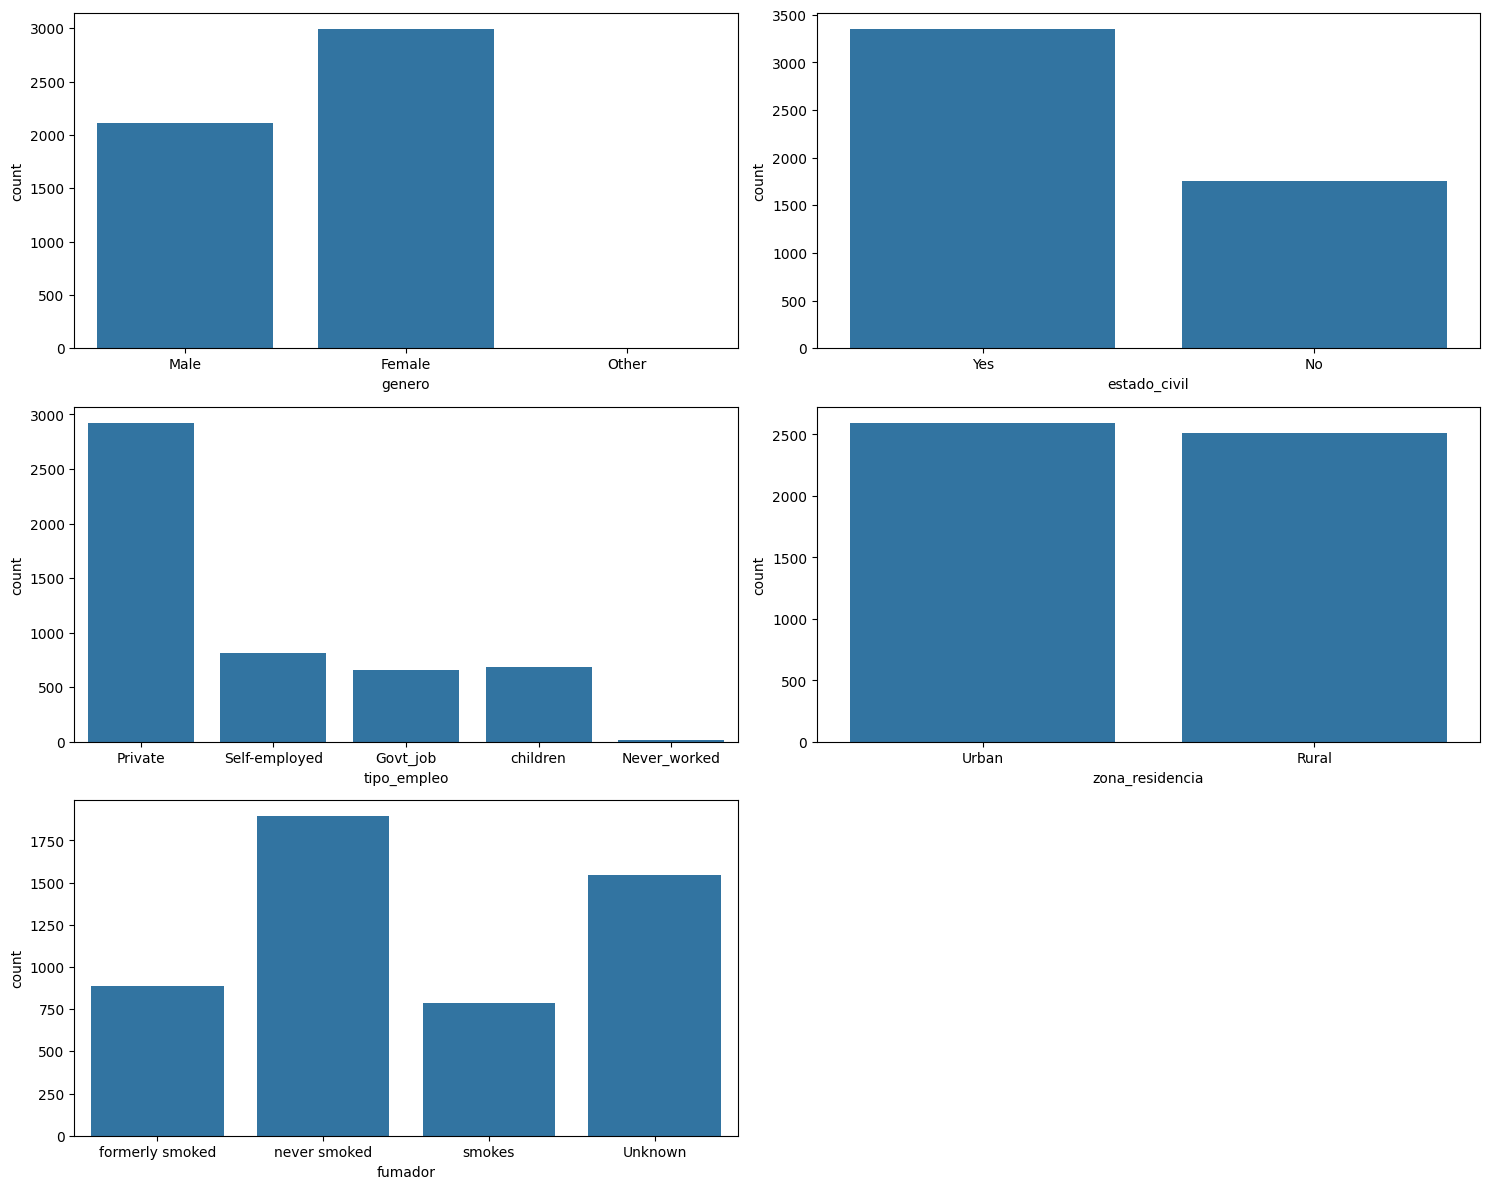

In [22]:
### Celda 22 - Gráficos de barras para variables categóricas
categoricas = ['genero', 'estado_civil', 'tipo_empleo', 'zona_residencia', 'fumador']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categoricas, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col)
    plt.xticks()
plt.tight_layout()
plt.show()

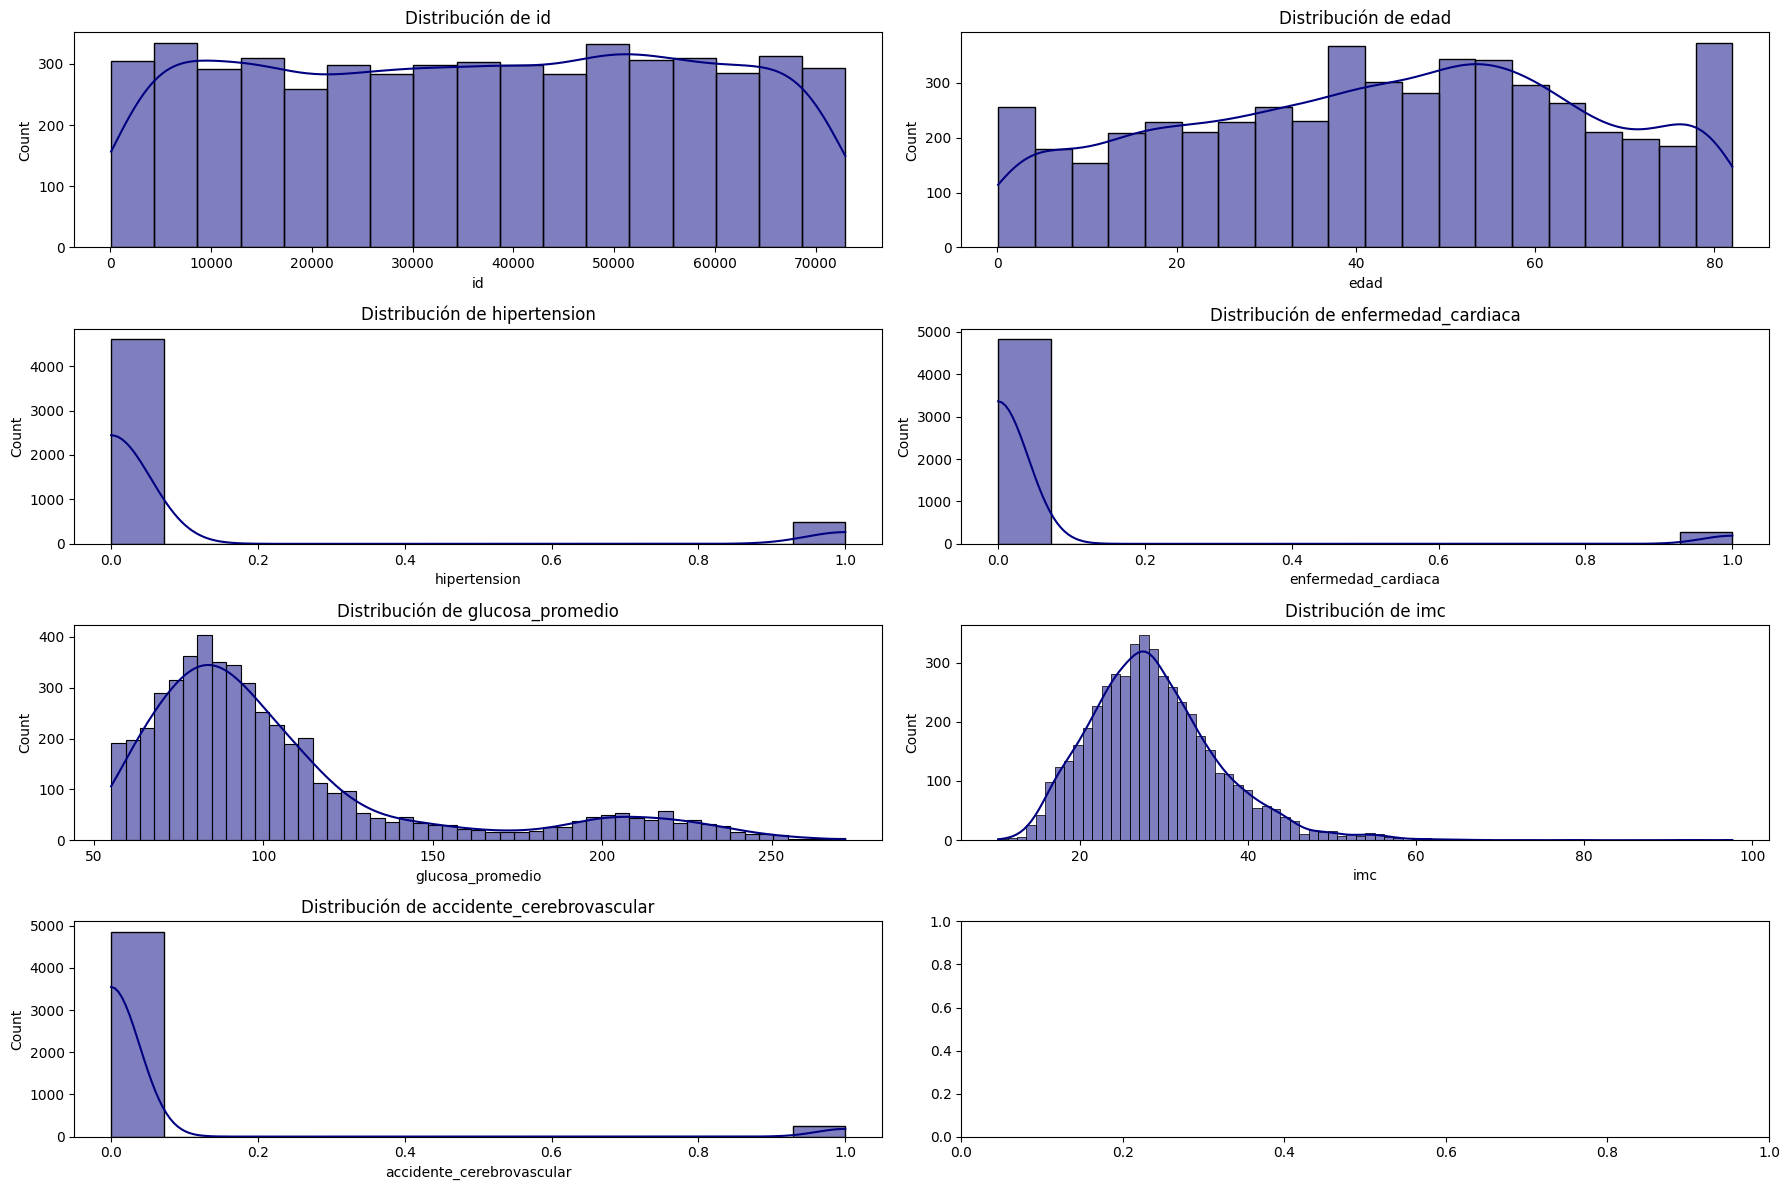

In [23]:
### Celda 23 - Histogramas de variables numéricas
num_cols = df.select_dtypes(include=['number']).columns

fig, ax = plt.subplots(
    nrows=int(np.ceil(len(num_cols)/2)),
    ncols=2,
    figsize=(18, 12)
)

i, j = 0, 0
for c in num_cols:
    sns.histplot(df[c], kde=True, ax=ax[i,j], color='navy', edgecolor='black')
    ax[i,j].set_title(f"Distribución de {c}")

    j += 1
    if j == 2:
        i += 1
        j = 0

plt.tight_layout()
plt.show()

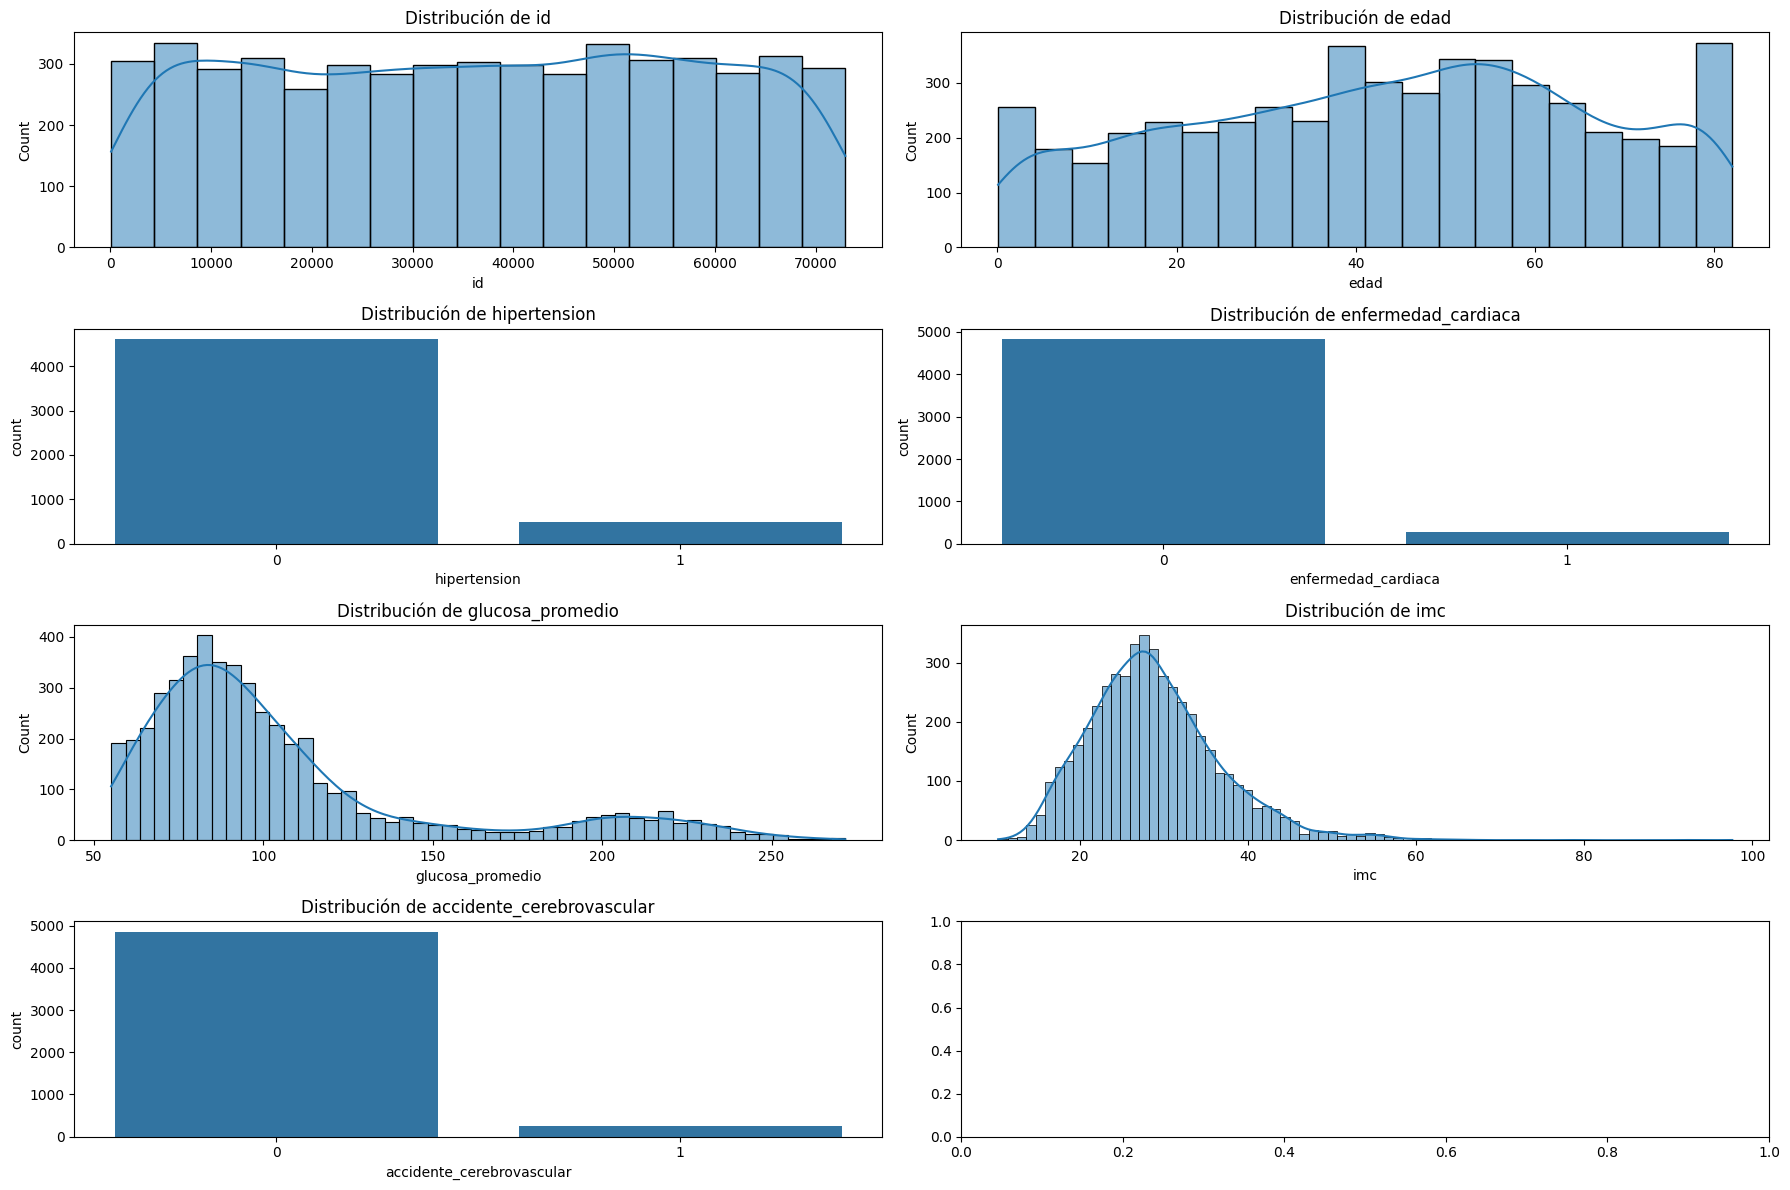

In [24]:
### Celda 23 - Histogramas de variables numéricas y binarias
num_cols = df.select_dtypes(include=['number']).columns

fig, ax = plt.subplots(
    nrows=int(np.ceil(len(num_cols)/2)),
    ncols=2,
    figsize=(18, 12)
)

i, j = 0, 0
for c in num_cols:

    # Si es binaria → countplot
    if df[c].nunique() <= 2:
        sns.countplot(x=df[c], ax=ax[i,j])
    else:
        sns.histplot(df[c], kde=True, ax=ax[i,j])

    ax[i,j].set_title(f"Distribución de {c}")

    j += 1
    if j == 2:
        i += 1
        j = 0

plt.tight_layout()
plt.show()

Aquí se ven representadas las distribuciones de todas las variables numéricas del dataset.

- Continuas (edad, glucosa_promedio, imc), que se visualizan mediante histogramas con una curva KDE para observar la forma de la distribución.
- Binarias (hipertension, enfermedad_cardiaca, accidente_cerebrovascular), que se representan con un conteo de valores, ya que solo toman valores 0 y 1.

Continuas:

- edad
Presenta una distribución amplia entre 0 y 80 años, con ligera concentración en la franja de 40–60. No hay sesgo pronunciado.

- glucosa_promedio
Tiene un sesgo positivo, con la mayoría de valores entre 70 y 140 mg/dL y una cola larga hacia valores altos (hasta ~270 mg/dL). Teniendo en cuenta que el valor normal se encuentra entre 100/120, indica que hay muchos sujetos con hiperglucemia

- imc
Distribución cercana a una forma normal pero con la cola derecha muy marcada. Existen valores muy altos que podrían ser outliers y revisaremos más adelante.

Binarias:
hipertension, enfermedad_cardiaca y accidente_cerebrovascular: la gran mayoría de la muestra pertenece al grupo 0 (no), lo que confirma que el dataset está desbalanceado respecto a esto.

Como comenté antes, las distribuciones identifican sesgos, outliers y la naturaleza de cada variable antes de aplicar técnicas estadísticas o modelos más avanzados.

# 3 - TRATAMIENTO DE NULOS

En anteriores apartados del análisis hemos visto que el dataset sólo tiene una columna con nulos, el imc (índice de masa corporal), recordemos:

In [25]:
### Celda 24 - Análisis de valores nulos (repetida para comprobar que no hay nulos)
df.isnull().sum()[df.isnull().sum() > 0]

,0
imc,201


Viendo que no son pocos nulos, tenemos que decidir qué hacer, porque eliminarlos directamente me temo que sería drástico para el análisis. Vamos a ver por qué hacer cada cosa:
 - eliminarlos? son 200 de un dataset de 5000, eso te quita bastantes registros (un 4%)
 - imputar con media? es muy posible, con los sesgos que hemos visto antes en la distribución (imc por ejemplo), y aunque no hemos estudiado outliers, si parece que haya
 - imputar con mediana? es lo mejor para que los outliers no afecten, porque representa mejor los valores típicos.

In [26]:
### Celda 25 - Imputamos valores nulos de 'imc' con la mediana
mediana_imc = df['imc'].median()
df['imc'].fillna(mediana_imc, inplace=True)

df.isnull().sum()

,0
id,0
genero,0
edad,0
hipertension,0
enfermedad_cardiaca,0
estado_civil,0
tipo_empleo,0
zona_residencia,0
glucosa_promedio,0
imc,0


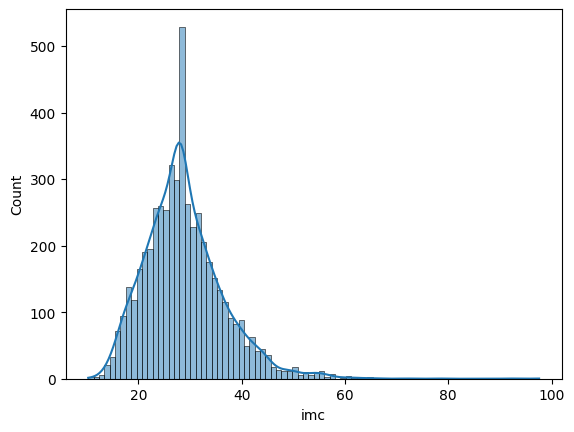

In [27]:
### Celda 26 - Comprobar la distribución tras imputar nulos
sns.histplot(df['imc'], kde=True)
plt.show()

# 4 - SKEWNESS / KURTOSIS

In [28]:
### Celda 27 - Cálculo de skewness y curtosis en numéricas continuas
vars_continuas = ['edad', 'glucosa_promedio', 'imc']

print("Skewness:")
display(df[vars_continuas].skew())

print("Kurtosis:")
display(df[vars_continuas].kurt())

Skewness:


,0
edad,-0.137059
glucosa_promedio,1.572284
imc,1.088187


Kurtosis:


,0
edad,-0.991010
glucosa_promedio,1.680479
imc,3.635306


Vamos a estudiar skewness:
- edad: -0.13 muy leve sesgo negativo, casi inapreciable
- glucosa_promedio: 1.57 esto indica sesgo positivo fuerte
- imc: 1.09 sesgo positivo también, moderado

Respecto a kurtosis:
- edad: -0.99,  no tiene picos altos, distribución plana
- glucosa_promedio: 1.68 pico más alto que lo normal, es cierto que hay grupos con +180
- imc: 3.63 distribución anormal. hay valores anormalmente altos, potenciales outliers que veremos en breve.

# 5 - OUTLIERS

Hemos visto anteriormente la posibilidad de que hubiera valores fuera de rango. De hecho en el mismo df.describe de la celda 9 podíamos intuirlo, sobre todo en los valores del índice de masa corporal. Vamos ahora a estudiarlos, y si corresponde, tratarlos.

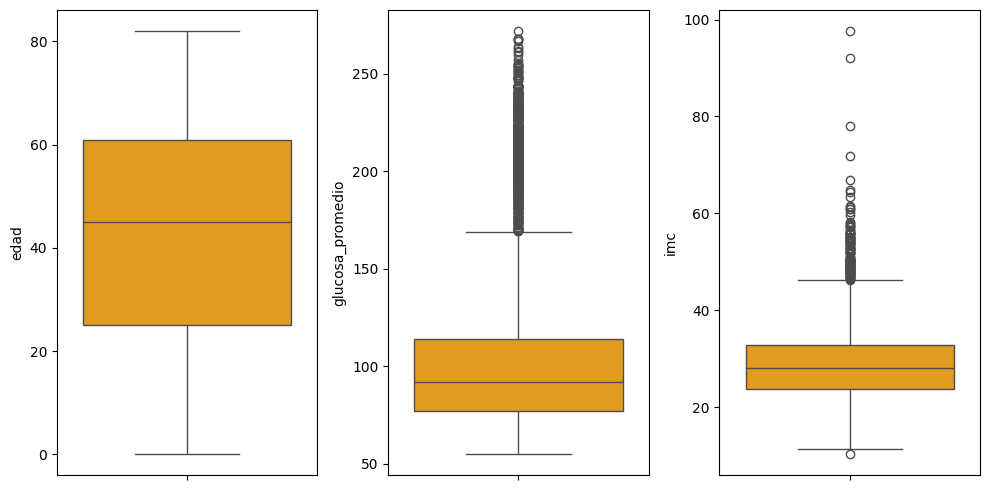

In [29]:
### Celda 28 - Graficamos los boxplots de las variables continuas (ya teníamos la variable)

plt.figure(figsize=(10, 5))

for i, col in enumerate(vars_continuas, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color="orange")
    plt.title("")

plt.tight_layout()
plt.show()

Aquí en este gráfico lo vemos perfectamente. Tenemos una distribución normal en la edad, outliers tanto en glucosa promedio, muy por encima del Q3 y también en imc, donde parece que también hay algún valor incongruente por abajo. Vamos a verlo numéricamente:

In [30]:
### Celda 29 - Identificación de outliers con IQR
# ya teníamos col definida, referenciado a imc
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)] # creamos el dataframe de outliers

In [31]:
### Celda 30 - Descripción de los outliers
display(outliers.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,126.0,33005.119048,21379.369324,99.00,14711.50,33495.00,50720.500,72911.00
edad,126.0,44.089206,14.094372,1.24,34.00,45.00,53.000,82.00
hipertension,126.0,0.166667,0.374166,0.00,0.00,0.00,0.000,1.00
enfermedad_cardiaca,126.0,0.007937,0.089087,0.00,0.00,0.00,0.000,1.00
glucosa_promedio,126.0,122.641905,58.484164,56.63,79.42,98.17,184.835,253.16
imc,126.0,52.974603,8.373290,10.30,48.80,51.60,55.175,97.60
accidente_cerebrovascular,126.0,0.023810,0.153064,0.00,0.00,0.00,0.000,1.00


De esta tabla representando el dataframe que hemos creado con los outliers de 'imc' , podemos tener información valiosa.

Por ejemplo:
- La edad media de las personas que están en el outlier por encima de imc es de 44 años, concentrados entre 34 y 53
- Los 126 outliers corresponden a individuos con un imc superior a 47.5.
- La hipertensión está presente en el 16,6% de los casos, casi el doble que en el dataset completo, coherente con el riesgo cardiovascular.
- glucosa_promedio media elevada (122 mg/dL) y máximos de hasta 253 mg/dL, indicando prediabetes o diabetes en muchos casos.
- enfermedad_cardiaca sorprendentemente baja (0,7%), media de edad más baja del grupo?
- accidente_cerebrobascular 2,38%, lo cual es menos que la media del dataset (4,8%). Esto puede sugerir que el imc por sí solo no predice el ictus sino la edad
- imc valores extremadamente altos (media 53, máximo 97,6). No son errores, sino casos clínicamente plausibles.

Como conclusión:
Los outliers de son informativos, no parecen errores, y muestran pacientes con riesgo metabólico elevado. Yo creo que hay razones para mantenerlo en el análisis.

In [32]:
### Celda 31 - Definición de variables para análisis de outliers
col_gluc = 'glucosa_promedio'
col_edad = 'edad'

Q1 = df[col_gluc].quantile(0.25)
Q3 = df[col_gluc].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_gluc = df[(df[col_gluc] < lim_inf) | (df[col_gluc] > lim_sup)]
display(outliers_gluc.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,627.0,36040.728868,21013.145967,239.00,16920.00,36377.0,53477.500,72915.00
edad,627.0,59.959553,16.257800,1.00,52.00,62.0,72.500,82.00
hipertension,627.0,0.258373,0.438090,0.00,0.00,0.0,1.000,1.00
enfermedad_cardiaca,627.0,0.164274,0.370820,0.00,0.00,0.0,0.000,1.00
glucosa_promedio,627.0,211.341595,20.825706,169.43,196.76,210.0,226.715,271.74
imc,627.0,32.842105,7.693916,14.20,28.00,31.1,36.800,71.90
accidente_cerebrovascular,627.0,0.133971,0.340893,0.00,0.00,0.0,0.000,1.00


Los valores extremos de glucosa corresponden a pacientes claramente mayores, con más comorbilidades y un riesgo cardiovascular mucho más alto que la media del dataset.

- edad: la media es de aprox 60 años! luego vemos que es un grupo bastante envejecido, muy diferente al de 'imc'
- hipertensión: 25,8% es mucho. una de cada cuatro personas
- enfermedad cardiaca: 16,4% esto es muy muy superior al promedio de todo el dataset (4.8)
- glucosa_promedio: media 211 mg/dL esto ya es sencillamente diabetes (normalmente los valores de glucemia mayores de 120).
- imc medio: 32.8 , es un pelín más elevado pero no parece que sea exagerado (obesidad de grado I)
→ Glucosa alta no implica IMC extremo.
- accidente_cerebrovascular: 13,4% esto es elevado. más del triple que la media del dataset

Conclusión clara:
Los individuos contenidos en el dataframe outliers de la variable glucosa_promedio representan un grupo envejecido, hipertenso, con mucha enfermedad cardiaca y un riesgo de ictus muy superior al de la población general. Estos valores son importantes, parece que podrían tener correlaciones y yo no los eliminaría.

In [33]:
Q1 = df[col_edad].quantile(0.25)
Q3 = df[col_edad].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_edad = df[(df[col_edad] < lim_inf) | (df[col_edad] > lim_sup)]
display(outliers_edad.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hipertension,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enfermedad_cardiaca,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glucosa_promedio,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imc,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accidente_cerebrovascular,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Esto que hemos obtenido es palmario. NO tenemos outliers en la variable 'edad', nada que limpiar aquí

# 6 - CORRELACIONES

In [34]:
corr = df.corr(numeric_only=True)
corr

,id,edad,hipertension,enfermedad_cardiaca,glucosa_promedio,imc,accidente_cerebrovascular
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.005555,0.006388
edad,0.003538,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hipertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
enfermedad_cardiaca,-0.001296,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
glucosa_promedio,0.001092,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
imc,0.005555,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
accidente_cerebrovascular,0.006388,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


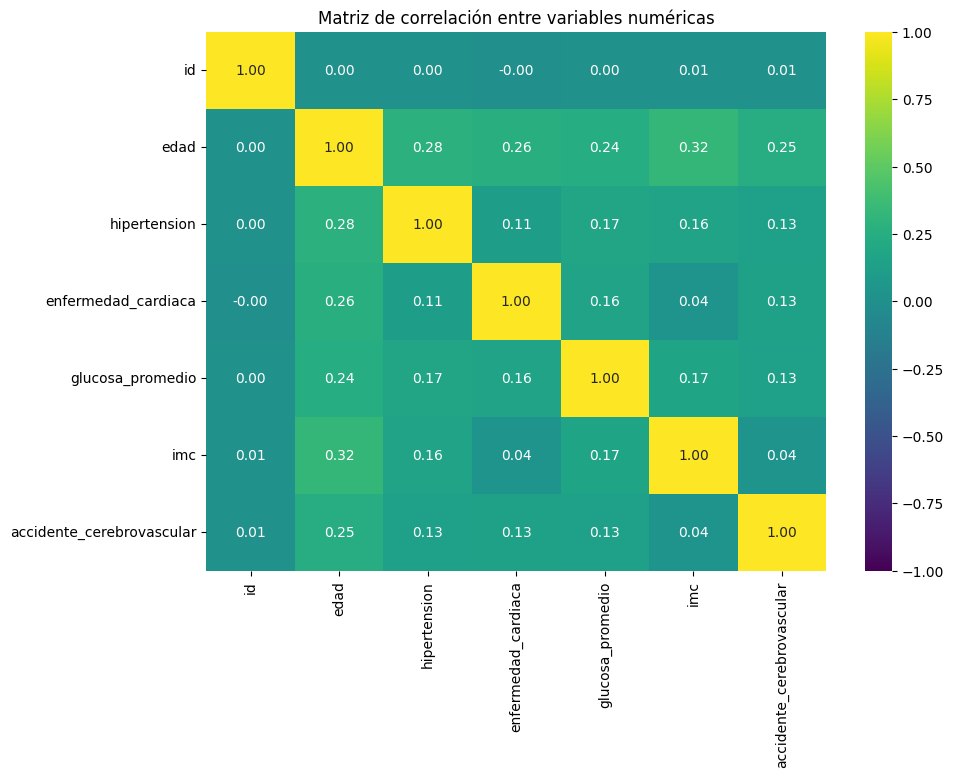

In [35]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", vmax=1, vmin=-1)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

De estos resultados en la matriz podemos deducir una cosa clara:
- NO hay un solo factor que influya directamente en el accidente cerebrovascular.

La única variable que parece tener algo que ver en los casos objetivo es la edad, pero sólo con un coeficiente de 0.25

In [36]:
pd.crosstab(df['hipertension'], df['accidente_cerebrovascular'], normalize='index') * 100

accidente_cerebrovascular,0,1
hipertension,,
0,96.032090,3.967910
1,86.746988,13.253012


Aquí ya hay cosas que podemos ver. De las personas con 0 hipertensión, o sea, sin, el 96% no han tenido ictus.

De las personas con hipertensión, casi el 87% sí han tenido ictus. O sea, el riesgo se triplica prácticamente. Luego podemos concluir que la hipertensión es un factor de riesgo claro. Vamos a seguir estudiándolo.

<Axes: xlabel='hipertension', ylabel='accidente_cerebrovascular'>

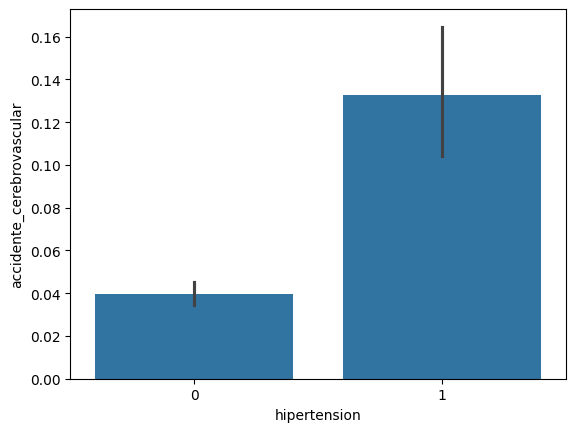

In [37]:
sns.barplot(x='hipertension', y='accidente_cerebrovascular', data=df)

Aquí en este punto es en el que te das cuenta de que podrías haber hecho alguna transformación o renombrar el dataframe al principio, para que se vea claramente que 0 es no, y 1 es sí. Como esto es sólo para las visualizaciones, paso el argumento en la impresión del gráfico y ya está:

<Axes: xlabel='hipertension', ylabel='accidente_cerebrovascular'>

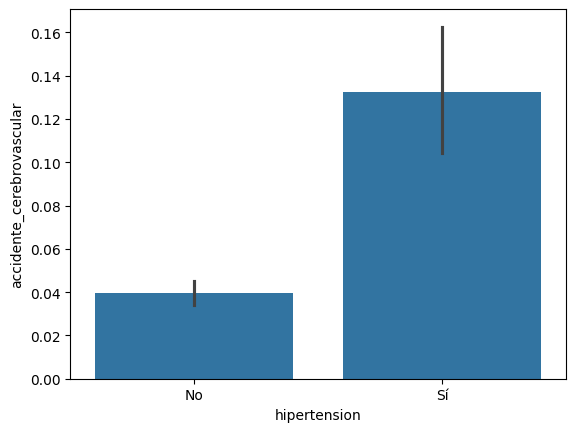

In [38]:
sns.barplot(x=df['hipertension'].map({0: "No", 1: "Sí"}), y=df['accidente_cerebrovascular'])

In [39]:
for col in categoricas:
    print(f"\n* {col.upper()} respecto a ictus *")
    display(pd.crosstab(df[col], df['accidente_cerebrovascular'], normalize='index') * 100)


* GENERO respecto a ictus *


accidente_cerebrovascular,0,1
genero,,
Female,95.290581,4.709419
Male,94.893617,5.106383
Other,100.000000,0.000000



* ESTADO_CIVIL respecto a ictus *


accidente_cerebrovascular,0,1
estado_civil,,
No,98.349459,1.650541
Yes,93.438712,6.561288



* TIPO_EMPLEO respecto a ictus *


accidente_cerebrovascular,0,1
tipo_empleo,,
Govt_job,94.977169,5.022831
Never_worked,100.000000,0.000000
Private,94.905983,5.094017
Self-employed,92.063492,7.936508
children,99.708879,0.291121



* ZONA_RESIDENCIA respecto a ictus *


accidente_cerebrovascular,0,1
zona_residencia,,
Rural,95.465394,4.534606
Urban,94.799692,5.200308



* FUMADOR respecto a ictus *


accidente_cerebrovascular,0,1
fumador,,
Unknown,96.955959,3.044041
formerly smoked,92.090395,7.909605
never smoked,95.243129,4.756871
smokes,94.676806,5.323194


Explicación del anterior:


# 7 -INGENIERIA DE VARIABLES

Viendo el estudio del apartado 5, donde vemos los outliers, no sé si tendría sentido aplicar transformaciones logarítmicas:
- Las variables continuas (edad, imc, glucosa) no presentan una asimetría tan extrema como para requerir un logaritmo.
- Transformar estas que he dicho sería distorsionar el significado "fisiológico"? O sea, se deberían tener en cuenta para temas de salud, igual hay que mantener las variables en su escala para analizar el patrón real.
- Hay modos de obtener información concluyente haciendo ciertas transformaciones. Por ejemplo:
- El imc se define ahora mismo según la OMS como bajo peso si está debajo de 18.5, normal entre 18.5 y 25, sobrepeso entre 25 y 30, y obesidad en diferentes grados por encima de 30
- También hay estándares en los estudios de salud para segmentar por edad: de 0 a 18 jóven, de 18 a 40 adulto, de 40 a 65 maduro y de 65 en adelante, senior.


In [40]:
df['categoria_imc'] = pd.cut(
    df['imc'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
)

df['grupo_edad'] = pd.cut(
    df['edad'],
    bins=[0, 18, 40, 65, 120],
    labels=['Menor', 'Adulto joven', 'Adulto', 'Mayor']
)

df['glucosa_alta'] = (df['glucosa_promedio'] > 140).map({False: "Normal", True: "Alta"})

df['fumador_binario'] = df['fumador'].replace({
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 1,
    'Unknown': np.nan
})

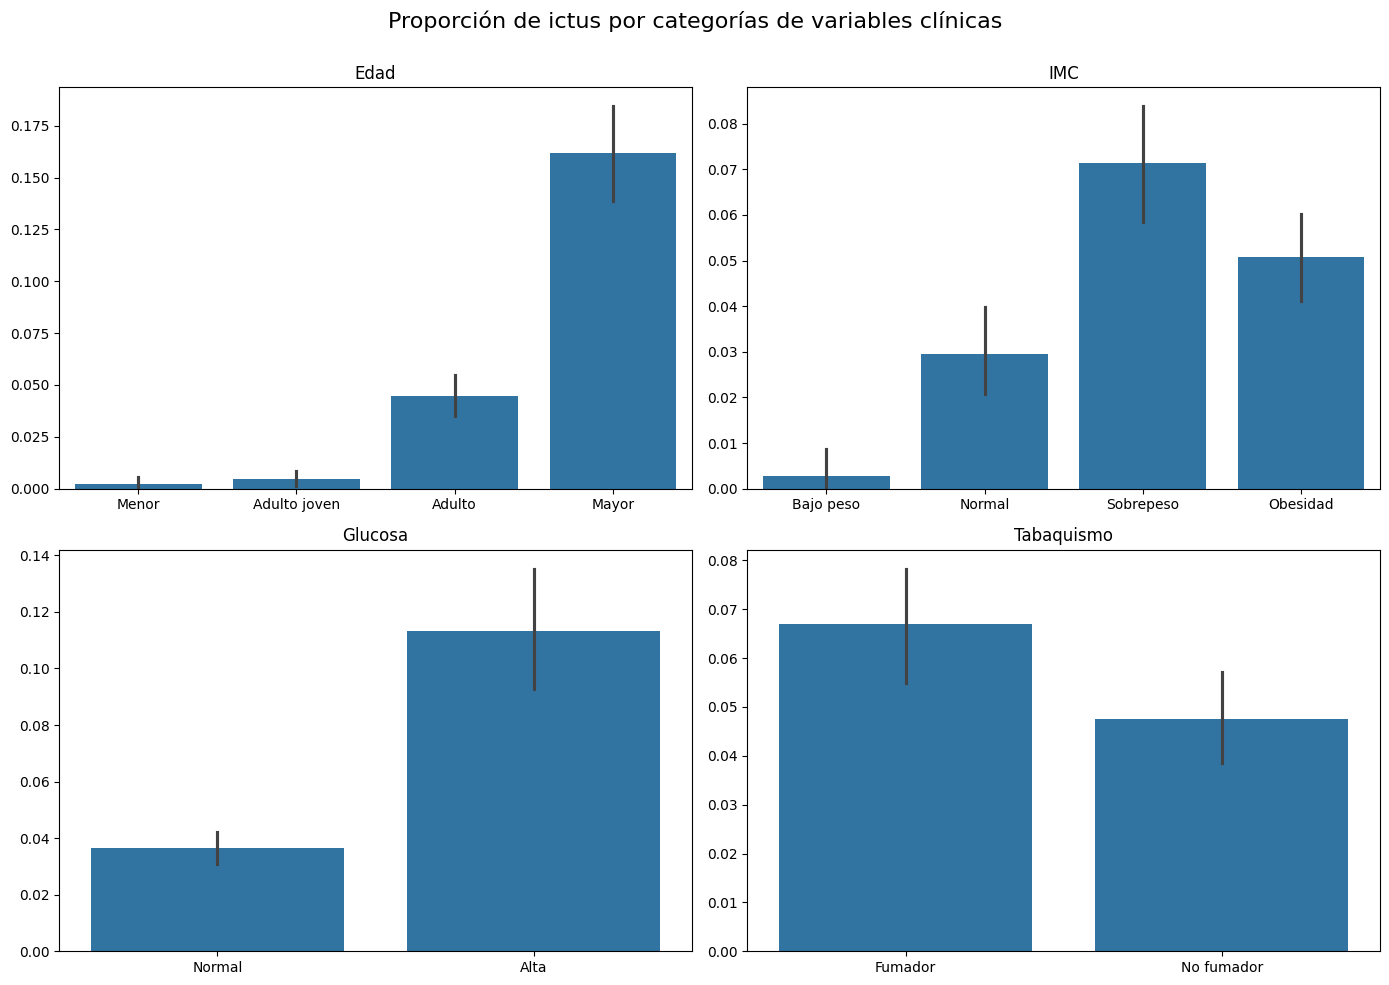

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Edad ---
sns.barplot(
    ax=axes[0,0],
    data=df,
    x='grupo_edad',
    y='accidente_cerebrovascular',
    order=['Menor', 'Adulto joven', 'Adulto', 'Mayor']
)
axes[0,0].set_title("Edad")
axes[0,0].set_xlabel("")      # quitamos nombre de eje X
axes[0,0].set_ylabel("")      # quitamos 'accidente_cerebrovascular'

# --- IMC ---
sns.barplot(
    ax=axes[0,1],
    data=df,
    x='categoria_imc',
    y='accidente_cerebrovascular',
    order=['Bajo peso','Normal','Sobrepeso','Obesidad']
)
axes[0,1].set_title("IMC")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")

# --- Glucosa ---
sns.barplot(
    ax=axes[1,0],
    data=df,
    x='glucosa_alta',
    y='accidente_cerebrovascular',
    order=['Normal','Alta']
)
axes[1,0].set_title("Glucosa")
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")

# --- Tabaquismo ---
sns.barplot(
    ax=axes[1,1],
    data=df.dropna(subset=['fumador_binario']),
    x=df['fumador_binario'].map({0:'No fumador',1:'Fumador'}),
    y='accidente_cerebrovascular'
)
axes[1,1].set_title("Tabaquismo")
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")

# Título general de la figura
fig.suptitle("Proporción de ictus por categorías de variables clínicas\n", fontsize=16)

plt.tight_layout()
plt.show()

Conclusión curiosa viendo el gráfico. Hay mayor proporción en imc con sobrepeso que en obesidad. El sobrepeso aparece con más ictus que la obesidad porque la muestra es pequeña y los grupos no están balanceados, no porque el sobrepeso sea más peligroso que la obesidad. Vamos a verlo:

In [42]:
df['categoria_imc'].value_counts(normalize=True) * 100

,proportion
categoria_imc,
Obesidad,37.045010
Sobrepeso,31.506849
Normal,24.618395
Bajo peso,6.829746


In [43]:
pd.crosstab(df['categoria_imc'], df['accidente_cerebrovascular'])

accidente_cerebrovascular,0,1
categoria_imc,,
Bajo peso,348,1
Normal,1221,37
Sobrepeso,1495,115
Obesidad,1797,96


Esta es un poco la prueba de que los grupos no están balanceados. En las proporciones tenemos que tienen obesidad el 37% , siendo la mayor de las muestras. De hecho hay 6 veces más personas obesas que con bajo peso.

En el segundo crosstab lo vemos también. hay 1800 personas con obesidad vs 1500 con sobrepeso.

# 8 - IMPORTANCIA DE VARIABLES Y ONEHOT

Con los datos que hemos analizado de nuestro dataset no podemos calcular todavía la importancia de variables porque el modelo requiere datos numéricos, y muchas variables aún son categóricas. El onehot encoding se realizará en el apartado siguiente, y solo entonces podremos aplicar regresión para evaluar la importancia


In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [45]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Copia para modelado
df_model = df.copy()

# Quitamos columnas que no aportan al modelo
df_model = df_model.drop(columns=['id'], errors='ignore')

# Para evitar líos con NaN en fumador_binario
df_model = df_model.dropna(subset=['fumador_binario'])

# Definir X (predictores) e y (target)
y = df_model['accidente_cerebrovascular']
X = df_model.drop(columns=['accidente_cerebrovascular'])

In [46]:
cols_categoricas = X.select_dtypes(include=['object', 'category']).columns
cols_categoricas.tolist()

['genero',
 'estado_civil',
 'tipo_empleo',
 'zona_residencia',
 'fumador',
 'categoria_imc',
 'grupo_edad',
 'glucosa_alta']

In [47]:
# One-hot encoding para variables categóricas
X_encoded = pd.get_dummies(X, columns=cols_categoricas, drop_first=True)

X_encoded.head()


,edad,hipertension,enfermedad_cardiaca,glucosa_promedio,imc,fumador_binario,genero_Male,genero_Other,estado_civil_Yes,tipo_empleo_Never_worked,...,zona_residencia_Urban,fumador_never smoked,fumador_smokes,categoria_imc_Normal,categoria_imc_Sobrepeso,categoria_imc_Obesidad,grupo_edad_Adulto joven,grupo_edad_Adulto,grupo_edad_Mayor,glucosa_alta_Normal
0,67.0,0,1,228.69,36.6,1.0,True,False,True,False,...,True,False,False,False,False,True,False,False,True,False
1,61.0,0,0,202.21,28.1,0.0,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
2,80.0,0,1,105.92,32.5,0.0,True,False,True,False,...,False,True,False,False,False,True,False,False,True,True
3,49.0,0,0,171.23,34.4,1.0,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
4,79.0,1,0,174.12,24.0,0.0,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False


In [48]:
# Separar en train/test estratificado (manteniendo proporciones)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print("Distribución original en y_train:\n")
print(y_train.value_counts(normalize=True) * 100)

# Aplicar SMOTE SOLO en el train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nDistribución tras SMOTE en y_train_res:\n")
print(y_train_res.value_counts(normalize=True) * 100)

Distribución original en y_train:

accidente_cerebrovascular
0    94.350962
1     5.649038
Name: proportion, dtype: float64

Distribución tras SMOTE en y_train_res:

accidente_cerebrovascular
0    50.0
1    50.0
Name: proportion, dtype: float64


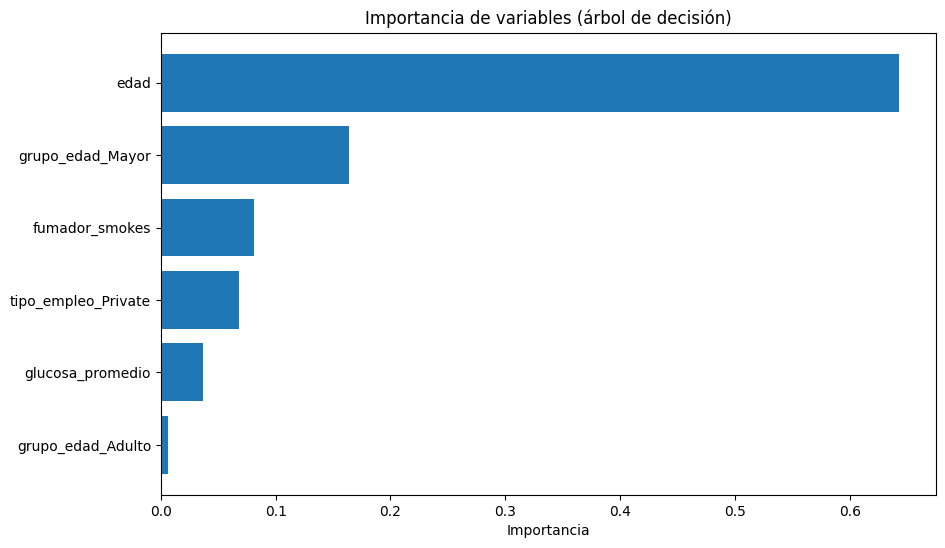

,0
edad,0.642870
grupo_edad_Mayor,0.164116
fumador_smokes,0.081523
tipo_empleo_Private,0.068432
glucosa_promedio,0.036833
grupo_edad_Adulto,0.006225


In [49]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

dtc.fit(X_train_res, y_train_res)

importancias = pd.Series(dtc.feature_importances_, index=X_train_res.columns)
importancias = importancias[importancias > 0].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(importancias.index, importancias.values)
ax.set_title("Importancia de variables (árbol de decisión)")
ax.set_xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()

importancias.head(15)

Este árbol devuelve las variables más importantes para predecir ictus:

1. grupo_edad_Mayor - De lejos la más importante (0.60)
2.	edad - Segunda más importante (0.20)

y luego menos relevantes:

- tipo_empleo_Private
- fumador_smokes
- tipo_empleo_Self-employed
- genero_Male

Se puede interpretar diciendo que la edad es, con diferencia, el mayor predictor del ictus en tu dataset.
El resto de variables aportan información, pero mucho menor.

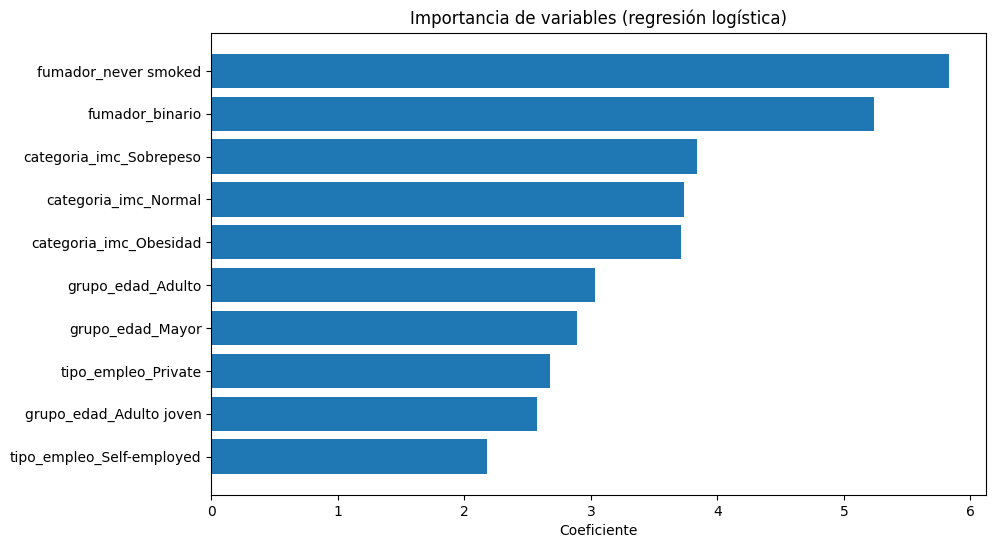

,0
fumador_never smoked,5.835027
fumador_binario,5.241802
categoria_imc_Sobrepeso,3.840742
categoria_imc_Normal,3.740207
categoria_imc_Obesidad,3.713695
grupo_edad_Adulto,3.032594
grupo_edad_Mayor,2.889864
tipo_empleo_Private,2.675256
grupo_edad_Adulto joven,2.574221
tipo_empleo_Self-employed,2.178762


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

lr = LogisticRegression(max_iter=1000)

sfm = SelectFromModel(estimator=lr)
sfm.fit(X_train_res, y_train_res)

# Coeficientes
fi = pd.Series(sfm.estimator_.coef_[0], index=X_train_res.columns)

# Nos quedamos con las variables seleccionadas por el modelo
vars_selected = fi[sfm.get_support()].sort_values(key=abs, ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(vars_selected.index, vars_selected.values)
ax.set_title("Importancia de variables (regresión logística)")
ax.set_xlabel("Coeficiente")
plt.gca().invert_yaxis()
plt.show()

vars_selected

Conclusión sobre las gráficas:

1. El árbol es mucho más claro:

La edad (especialmente pertenecer al grupo de “mayores”) es el factor más determinante para predecir ictus en este dataset.

2. La regresión revela relaciones adicionales:

El tabaquismo y el IMC también muestran asociaciones relevantes con el ictus, aunque su interpretación debe hacerse con cuidado al estar codificados como variables dummy. Las variables categóricas convertidas a dummies no se pueden interpretar como importancias independientes ya que cada una mide su efecto relativo respecto a la categoría base, así que hay que interpretarlas con cuidado.

3. Diferencia conceptual importante:
	•	El árbol mide impacto real en la decisión.
	•	La regresión logística no mide importancia global.

4. No hay contradicción entre ambos modelos

Ambos coinciden en que:
	•	La edad / grupo de edad es clave.
	•	El tabaquismo y ciertas categorías de IMC influyen.


### CONCLUSION FINAL

Aunque seguiría el estudio intentando obtener más datos, sí que es cierto que se aprecian factores de riesgo en la muestra